# Machine learning - Breast Cancer Diagnostic: Benign or Malignant
## Alhussain Almarhabi

In [3]:
import numpy as np 
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Cancer_UCI.csv')
dfc = df.drop(['id','Unnamed: 32'],axis=1)

In [6]:
df.head(2)
dfc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


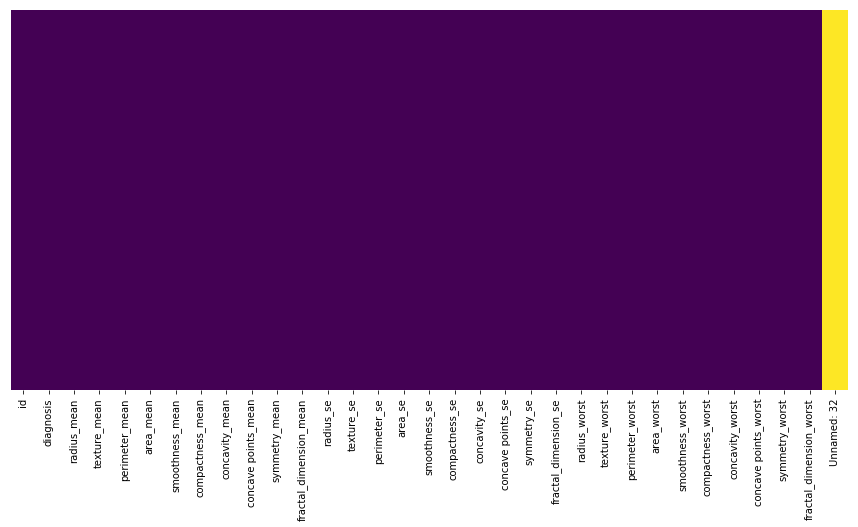

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
pp = df.describe()
pp.transpose()#.head(5)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
#df_mean.corr(method='pearson')

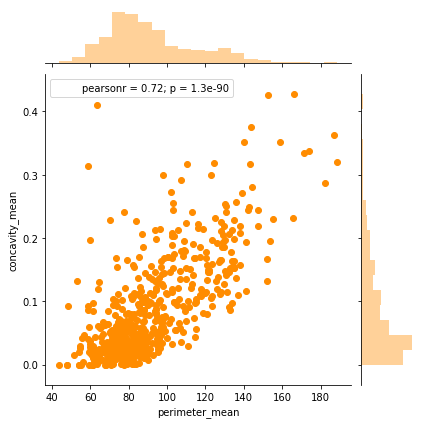

In [11]:
sns.jointplot(x='perimeter_mean',y='concavity_mean',data=df,kind='scatter'\
              ,color='darkorange')

# dividing the featurs into three group
## mean, standard deviation and worst of the cells

In [12]:
labels_mean = ['diagnosis','radius_mean','texture_mean','perimeter_mean',\
               'area_mean','smoothness_mean','compactness_mean',\
               'concavity_mean','concave points_mean','symmetry_mean',\
               'fractal_dimension_mean']

labels_se = ['diagnosis','radius_se','texture_se','perimeter_se','area_se',\
             'smoothness_se','compactness_se','concavity_se',\
            'concave points_se','symmetry_se','fractal_dimension_se']

labels_worst = ['diagnosis','radius_worst','texture_worst','perimeter_worst',\
                'area_worst','smoothness_worst','compactness_worst',\
                'concavity_worst','concave points_worst','symmetry_worst',\
                'fractal_dimension_worst']
# index label and classification 
'''
id                         569 non-null int64
diagnosis                  569 non-null object
'''
# mean label summary 
'''
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
'''
#df_mean = df.iloc[:,1:12]
df_mean = df[labels_mean]

# standard deviation label summary 
'''
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
'''

df_se = df[labels_se]

# worst or largest label summary 
'''
radius_worst               569 non-null float64
texture_worst              569 non-null float64
perimeter_worst            569 non-null float64
area_worst                 569 non-null float64
smoothness_worst           569 non-null float64
compactness_worst          569 non-null float64
concavity_worst            569 non-null float64
concave points_worst       569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
'''
df_worst = df[labels_worst]

# preview the divided data

In [13]:
df_mean.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [14]:
df_se.head(3)

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571


In [15]:
df_worst.head(3)

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


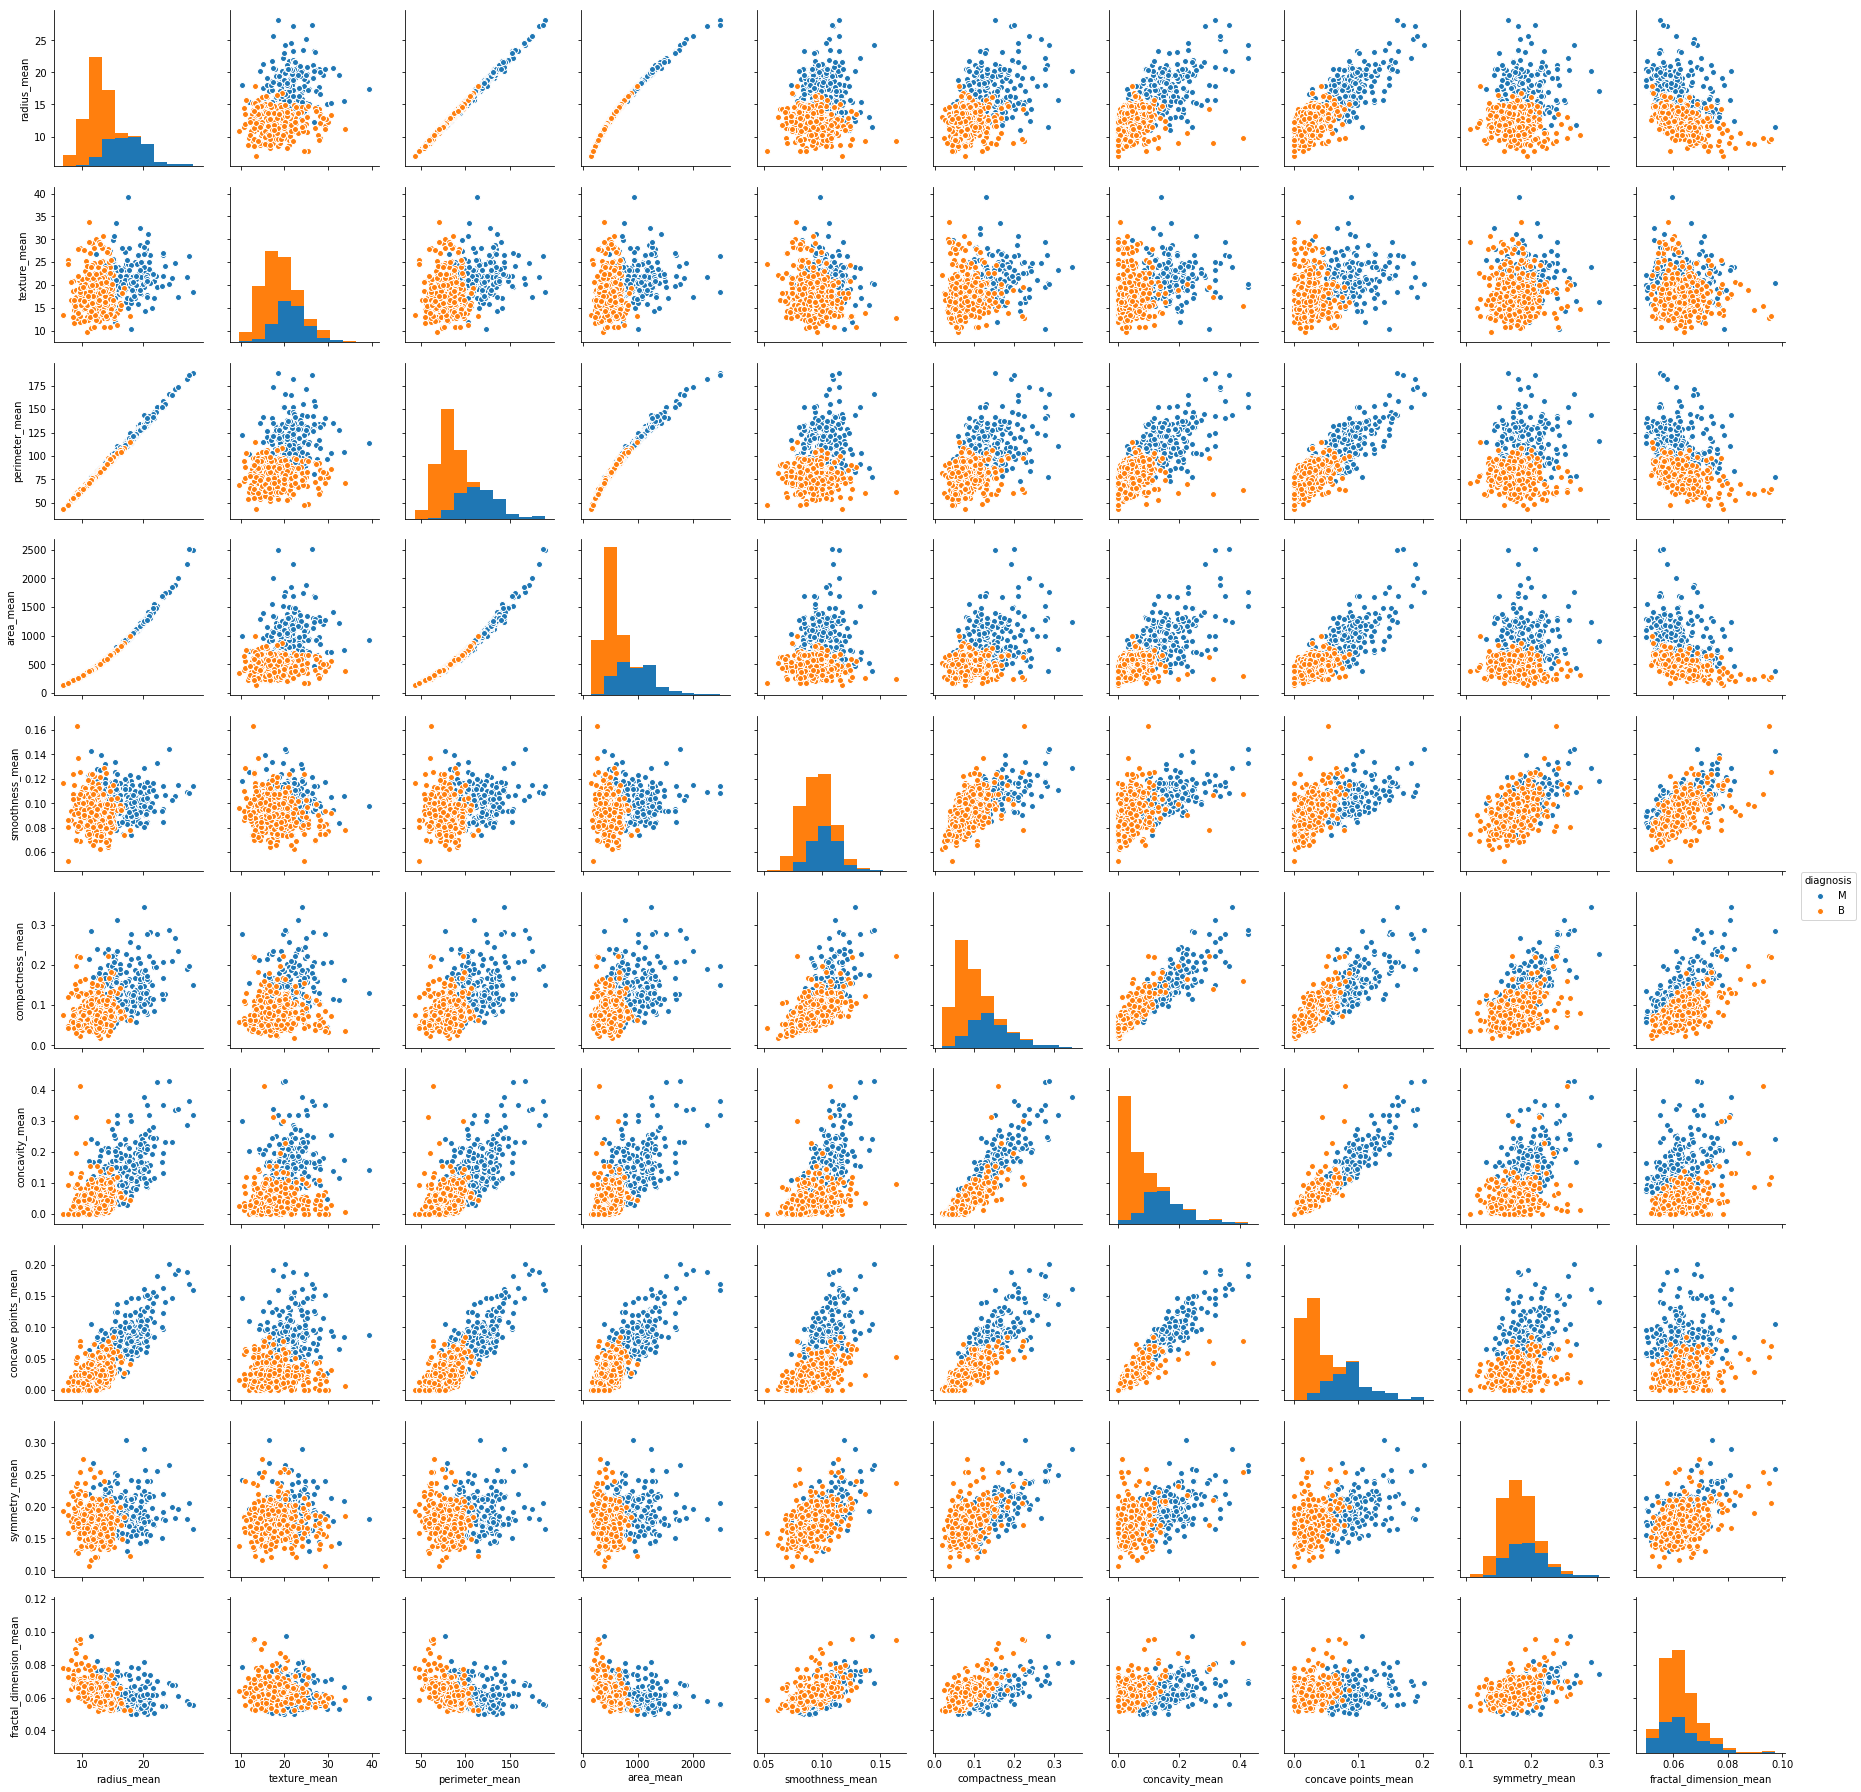

In [14]:
sns.pairplot(data=df_mean,hue='diagnosis')\
.savefig('mean_pairplot.png')

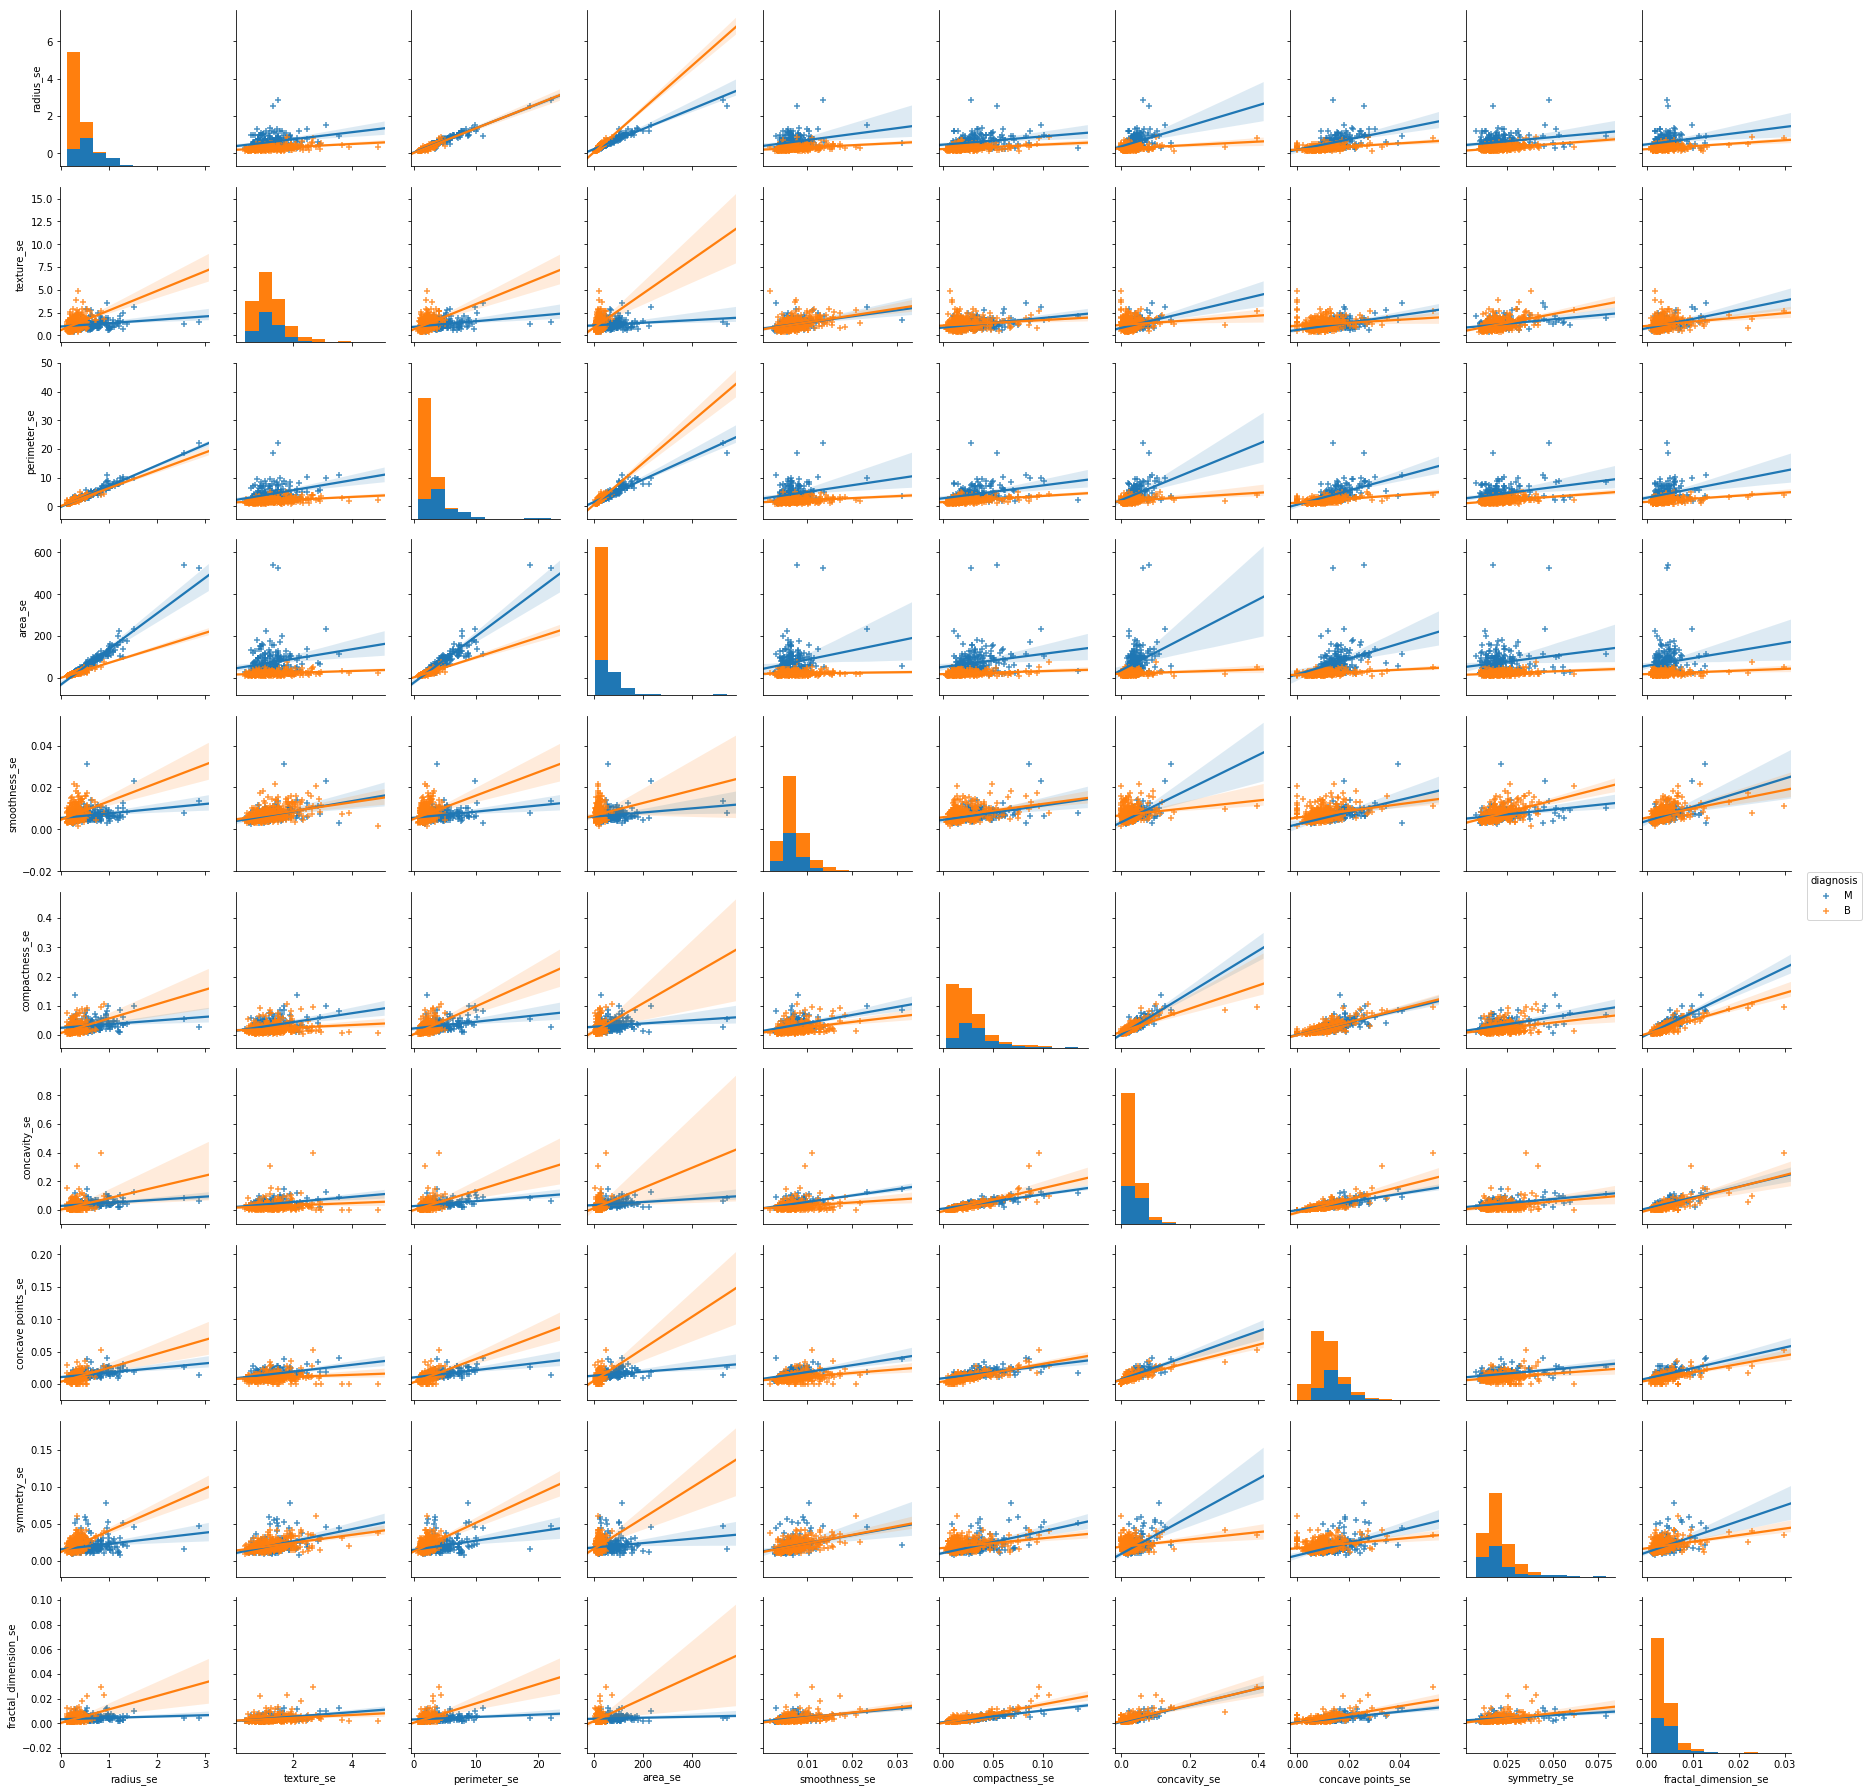

In [39]:
sns.pairplot(data=df_se,hue='diagnosis',markers=["+", "+"],kind='reg')\
.savefig('se_pairplot.png')

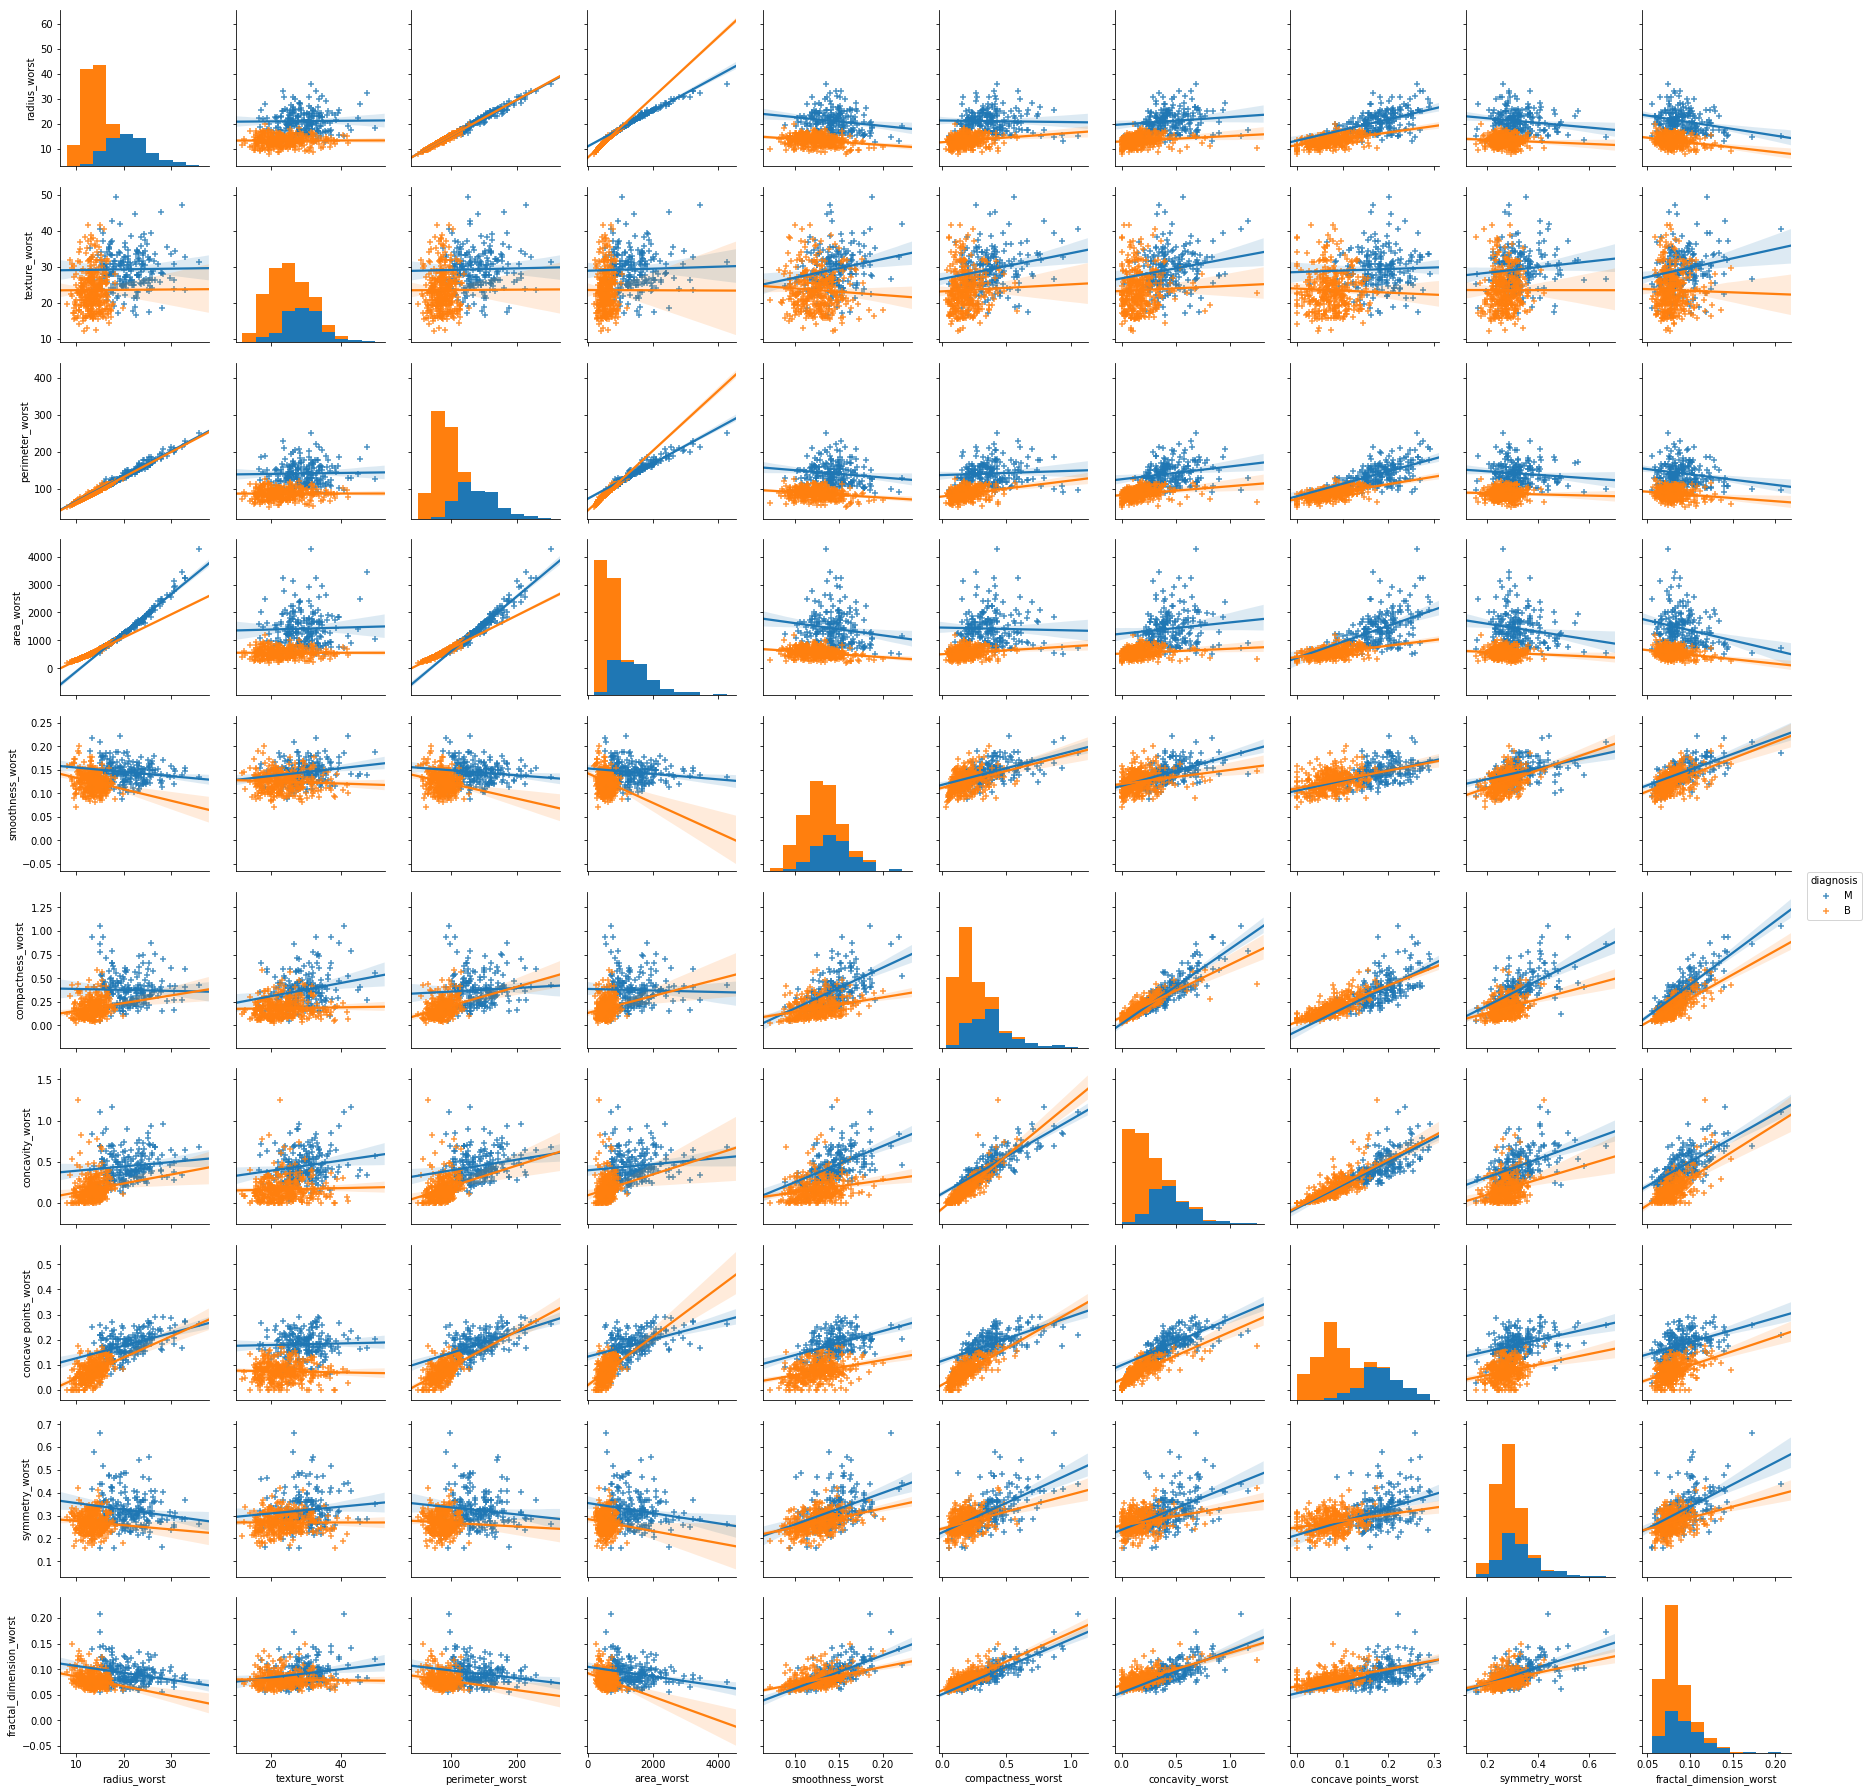

In [16]:
sns.pairplot(data=df_worst,hue='diagnosis',markers=["+", "+"],kind='reg')\
.savefig('worst_pairplot.png')

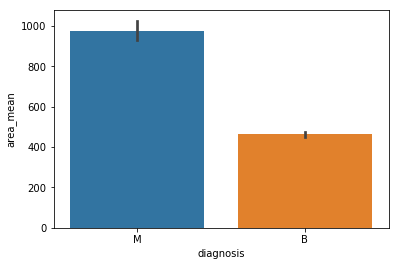

In [16]:
sns.barplot(x='diagnosis',y='area_mean',data=df_mean)

'\nTotal instance we have are 569 350 is B and 219 is M\n'

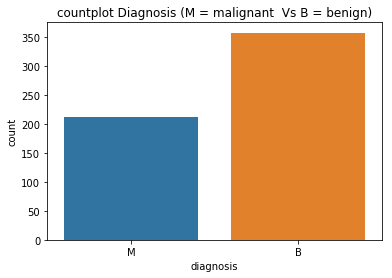

In [17]:
# count number of benign and malignant
sns.countplot(x='diagnosis',data=df)
plt.title('countplot Diagnosis (M = malignant  Vs B = benign)',)
plt.savefig('bvsm_countplot.png')
'''
Total instance we have are 569 350 is B and 219 is M
'''

In [18]:
# count B and M for mean groupped
#sns.countplot(x='diagnosis',data=df_mean)

In [19]:
# count for standard deviation groupped
#sns.countplot(x='diagnosis', data=df_se)

In [20]:
# count for worst groupped
#sns.countplot(x='diagnosis', data=df_worst)

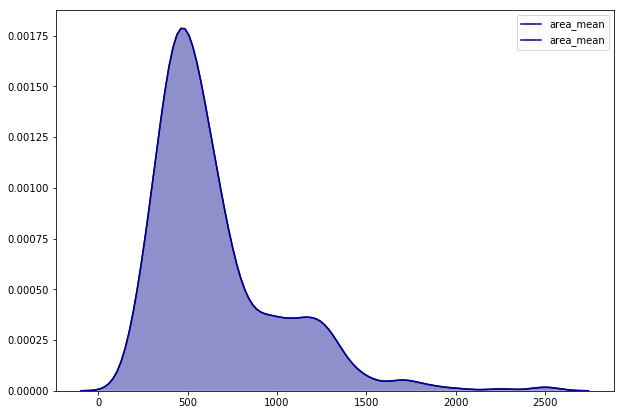

In [21]:
plt.figure(figsize=(10,7)) 
#sns.kdeplot(tips['tip'],shade=True,color='lightgreen')
sns.kdeplot(df_mean['area_mean'],shade=True,color='darkblue')
sns.kdeplot(df_mean['area_mean'],shade=True,color='darkblue')

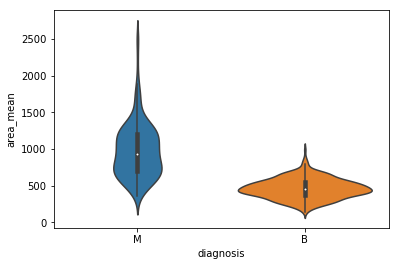

In [22]:
sns.violinplot(x='diagnosis',y='area_mean',data=df_mean)


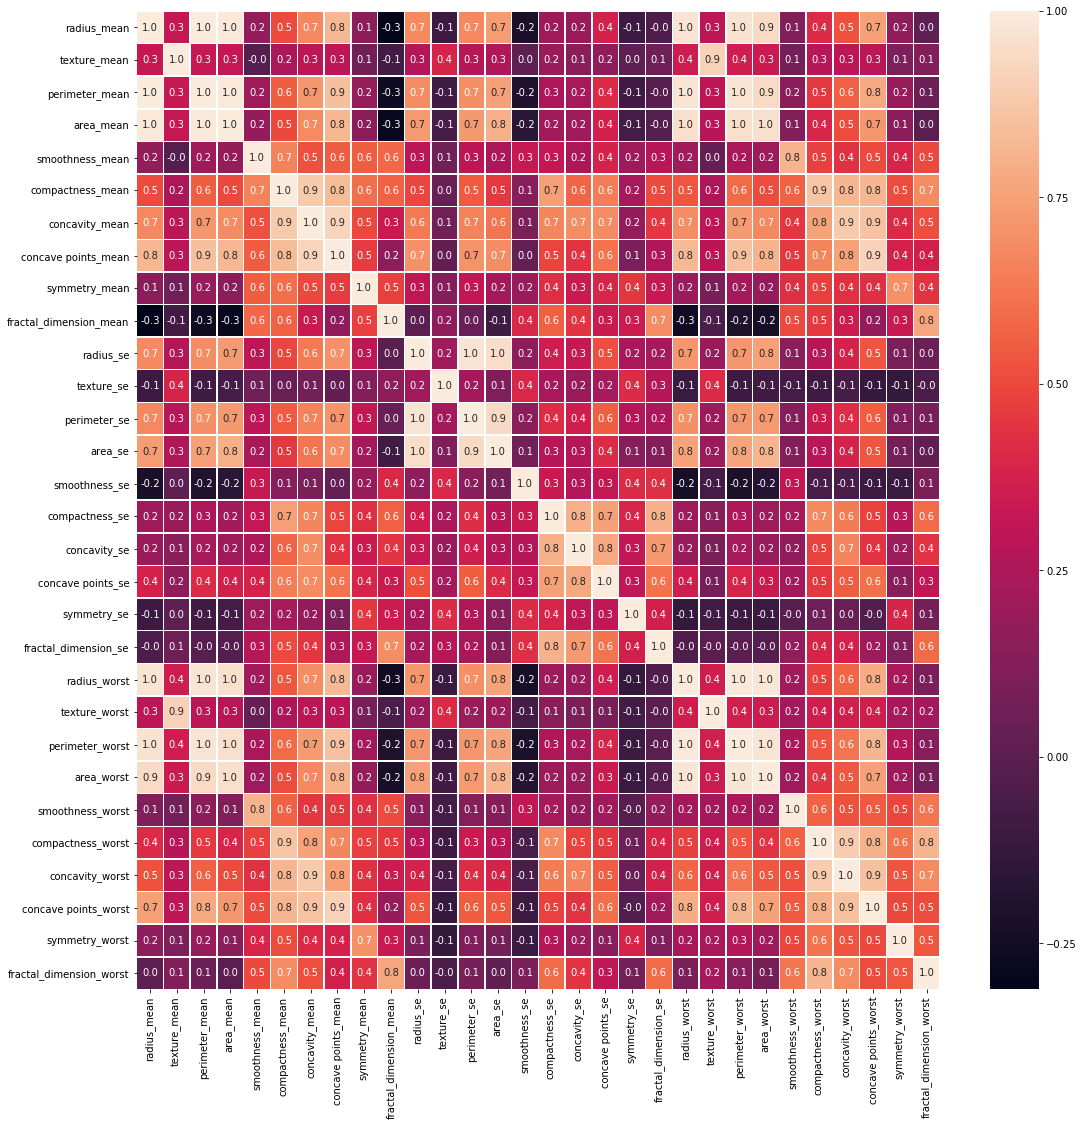

In [40]:
plt.subplots(figsize=(18, 18))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.1f')

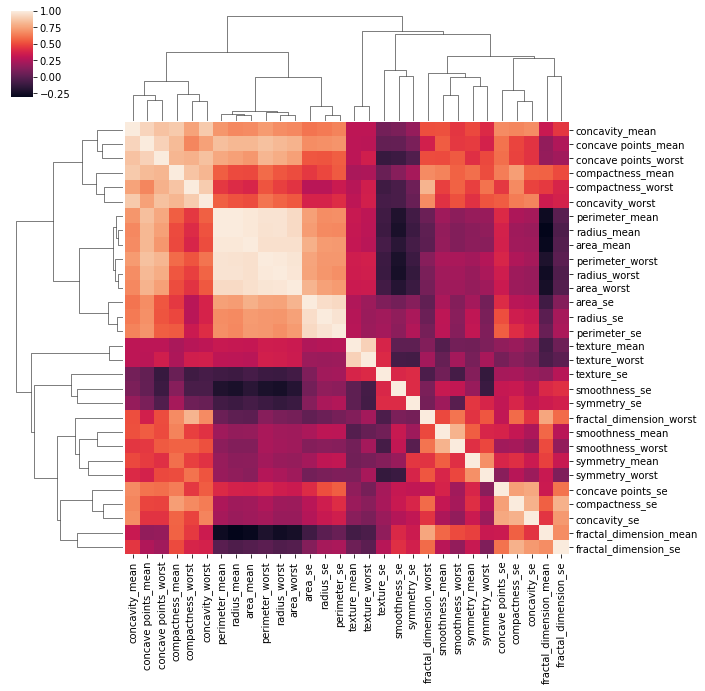

In [37]:
sns.clustermap(dfc.corr())

In [26]:
df_mean['diagnosis'].unique()

array(['M', 'B'], dtype=object)

(0.0, 0.23)

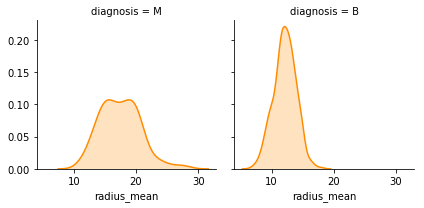

In [23]:
plt.figure(figsize=(10,7)) 
g = sns.FacetGrid(data=df_mean,col='diagnosis')
g.map(sns.kdeplot,'radius_mean',shade=True,color='darkorange')
plt.ylim(ymax=0.23)

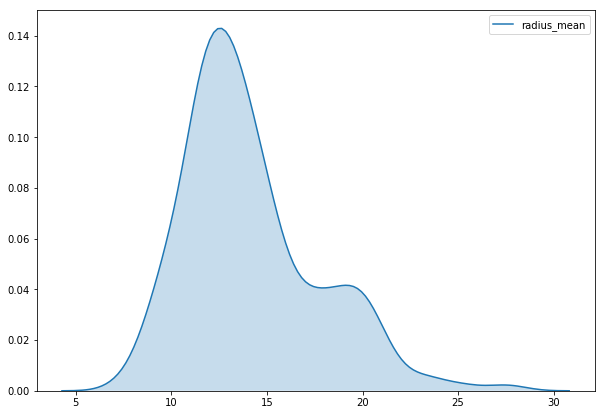

In [24]:
plt.figure(figsize=(10,7)) 
sns.kdeplot(data=df_mean['radius_mean'],shade=True)

(0.0, 4.3)

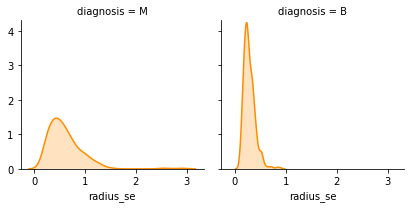

In [28]:
plt.figure(figsize=(10,7)) 
g = sns.FacetGrid(data=df_se,col='diagnosis')
g.map(sns.kdeplot,'radius_se',shade=True,color='darkorange')
plt.ylim(ymax=4.3)

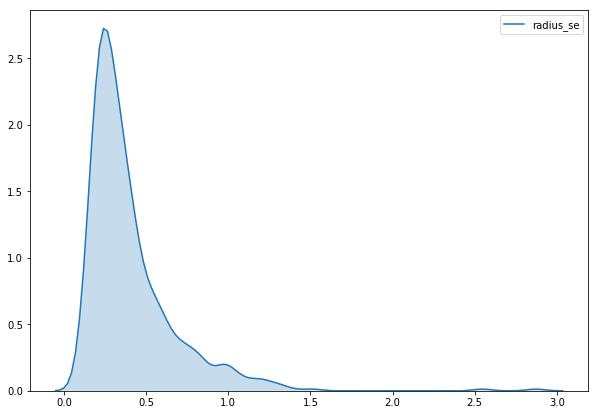

In [29]:
plt.figure(figsize=(10,7)) 
sns.kdeplot(data=df_se['radius_se'],shade=True)

(0.0, 13.5)

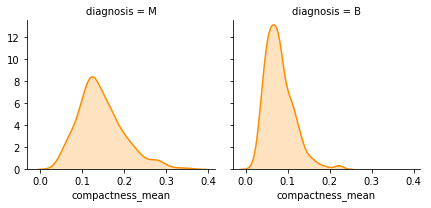

In [35]:
plt.figure(figsize=(10,7)) 
g = sns.FacetGrid(data=df_mean,col='diagnosis')
g.map(sns.kdeplot,'compactness_mean',shade=True,color='darkorange')
plt.ylim(ymax=13.5)

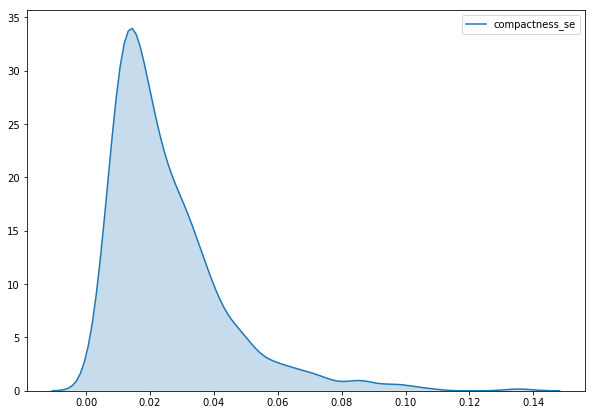

In [36]:
plt.figure(figsize=(10,7)) 
sns.kdeplot(data=df_se['compactness_se'],shade=True)

In [29]:
dfc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [30]:
'''
does not effect our result if we made it dummies
Diagnosis = pd.get_dummies(dfc['diagnosis'], drop_first=True)


and we removing the first columns in dumies to solve common
problem in statistics known as multicollinearity.

# Add the dummies to dataframe
dfc = pd.concat([dfc,Diagnosis], axis=1)
dfc.head(2)

now since we encode the diagnosis we can delelt
the string columns

dfc.drop('diagnosis', axis=1, inplace=True)
dfc.head(2)
''';

In [31]:
# we want to standarize the data before using KNN - dfc : dataframe name
from sklearn.preprocessing import StandardScaler

In [32]:
# creat instant for scaler as you make model for machine learning 
scaler = StandardScaler()

In [33]:
# fit the model
scaler.fit(dfc.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_features = scaler.transform(dfc.drop('diagnosis', axis=1))

In [36]:
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [37]:
# how to list dataframe columns name and how to delete the last col.
#dfc.columns show all
dfc.columns[1:]


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df_feat = pd.DataFrame(scaled_features, columns=dfc.columns[1:])

In [39]:
# now we can we that the standrized features is in dataframe
df_feat.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [40]:
from sklearn.cross_validation import train_test_split

/Users/alhussainalmarhabi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
# divide the data 70% train and 30% test
X = df_feat
y = dfc['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
# know import the model and fit it 
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
# the used metrics is the defult one minkowski, depend on the k
# and in our case k =1 so it;s Manhattan distance 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
pred = knn.predict(X_test)

In [46]:
pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[102   3]
 [  5  61]]


             precision    recall  f1-score   support

          B       0.95      0.97      0.96       105
          M       0.95      0.92      0.94        66

avg / total       0.95      0.95      0.95       171



In [74]:
# know we can do plot to see the best k to select we cac do loop
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # average where my prediction is not equal to actual  
    

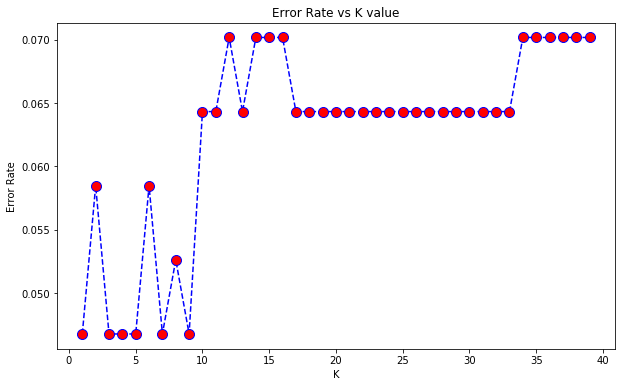

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
# let us see if we can improve model at k = 4
knn_k4 = KNeighborsClassifier(n_neighbors=4)
knn_k4.fit(X_train,y_train)
pred_k4 = knn.predict(X_test)
print(confusion_matrix(y_test,pred_k4))
print('\n')
print(classification_report(y_test,pred_k4))

[[104   1]
 [ 11  55]]


             precision    recall  f1-score   support

          B       0.90      0.99      0.95       105
          M       0.98      0.83      0.90        66

avg / total       0.93      0.93      0.93       171



In [52]:

# creat instant for scaler as you make model for machine learning 
scaler1 = StandardScaler()

# fit standarScaler to your features but after dropping
# the categorical 
scaler1.fit(df_mean.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_features1 = scaler1.transform(df_mean.drop('diagnosis', axis=1))

scaled_features1

#know I want to make this standrized feature into Dataframe

# how to list dataframe columns name and how to delete the last col.
#df.columns show all

df_feat1 = pd.DataFrame(scaled_features1, columns=df_mean.columns[1:])

#df_feat.head()

X1 = df_feat1
y1 = df_mean['diagnosis']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)

knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(X_train1,y_train1)

pred1 = knn1.predict(X_test1)

print(confusion_matrix(y_test1,pred1))
print('\n')
print(classification_report(y_test1,pred1))

error_rate1 = []

for i in range(1,40):
    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train1,y_train1)
    pred1_i = knn1.predict(X_test1)
    error_rate1.append(np.mean(pred1_i != y_test1)**2) # average where my prediction is not equal to actual  


[[96  9]
 [ 4 62]]


             precision    recall  f1-score   support

          B       0.96      0.91      0.94       105
          M       0.87      0.94      0.91        66

avg / total       0.93      0.92      0.92       171



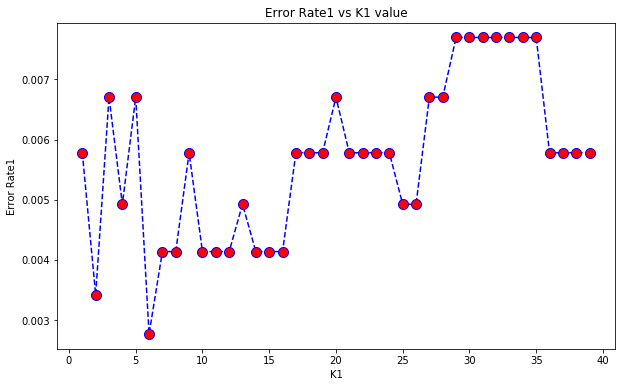

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate1,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate1 vs K1 value')
plt.xlabel('K1')
plt.ylabel('Error Rate1')

In [54]:
knn1 = KNeighborsClassifier(n_neighbors=6)

knn1.fit(X_train1,y_train1)

pred1 = knn1.predict(X_test1)

print(confusion_matrix(y_test1,pred1))
print('\n')
print(classification_report(y_test1,pred1))

[[102   3]
 [  6  60]]


             precision    recall  f1-score   support

          B       0.94      0.97      0.96       105
          M       0.95      0.91      0.93        66

avg / total       0.95      0.95      0.95       171



In [55]:
# divide the data 70% train and 30% test
X4 = df_feat
y4 = dfc['diagnosis']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=101)

In [56]:
from sklearn.svm import SVC

In [57]:
model4 = SVC()

In [58]:
model4.fit(X_train4,y_train4)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
pred4 = model4.predict(X_test4)

In [60]:
pred4

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [61]:
print(confusion_matrix(y_test4,pred4))
print('\n')
print(classification_report(y_test4,pred4))

[[104   1]
 [  3  63]]


             precision    recall  f1-score   support

          B       0.97      0.99      0.98       105
          M       0.98      0.95      0.97        66

avg / total       0.98      0.98      0.98       171



In [62]:
from sklearn.grid_search import GridSearchCV 

/Users/alhussainalmarhabi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [63]:
# we will use dictionary her 
param_grid4 = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [64]:
# GridSearchCV(youmodel, list of param you want to check, 
# verbose is number of show output so you don't end in loop
# also refit which by default true to fit model again
# after fitting it )
grid4 = GridSearchCV(SVC(),param_grid=param_grid4,verbose=3)

In [65]:
grid4.fit(X_train4,y_train4)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.909774 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.917293 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.931818 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... C=10, gamma=1, score=0.631579 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.639098 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.636364 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.932331 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.962406 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.984848 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.962406 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [66]:
grid4.best_params_

{'C': 100, 'gamma': 0.0001}

In [67]:
grid4.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
grid_pred4 = grid4.predict(X_test4)

In [69]:
print(confusion_matrix(y_test4,grid_pred4))
print('\n')
print(classification_report(y_test4,grid_pred4))

[[105   0]
 [  6  60]]


             precision    recall  f1-score   support

          B       0.95      1.00      0.97       105
          M       1.00      0.91      0.95        66

avg / total       0.97      0.96      0.96       171



In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test1,pred1)

0.94736842105263153